In [3]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        # Run the init method from parent
        super().__init__()
        # define fully connected layers
        self.fc1 = nn.Linear(28*28, 64) # 28x28
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) # rectified linear, run activation function (Whether or not the neuron is firing) over entire layer
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) # Why not on this layer, it needs to convert to the 10 outputs at the end
        
        # Could have logic here for particular stuff.
        
        return F.log_softmax(x, dim=1) # dimentiaon on which to apply softmax, like axis
        
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [4]:
class Net(nn.Module):
    
    def __init__(self):
        # Run the init method from parent
        super().__init__()
        # define fully connected layers
        self.fc1 = nn.Linear(28*28, 64) # 28x28
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) # rectified linear, run activation function (Whether or not the neuron is firing) over entire layer
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) # Why not on this layer, it needs to convert to the 10 outputs at the end
        
        # Could have logic here for particular stuff.
        
        return F.log_softmax(x, dim=1) # dimentiaon on which to apply softmax, like axis
        
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [5]:
X = torch.rand((28,28))
X = X.view(-1,28*28)

In [6]:
output = net(X)

In [7]:
output

tensor([[-2.4102, -2.4158, -2.3654, -2.3693, -2.1820, -2.2337, -2.3457, -2.3440,
         -2.1751, -2.2240]], grad_fn=<LogSoftmaxBackward0>)

In [13]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

# Whole passes through dataset
EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a bathc of featuresets and Labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28)) #784
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step() # apply tweaked weights
    print(loss)

tensor(0.0124, grad_fn=<NllLossBackward0>)
tensor(0.1743, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)


In [14]:
correct = 0
total = 0

# for every prediction we made, does it match the actual taget value.
with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3)) #

Accuracy:  0.983


In [11]:
print(X)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

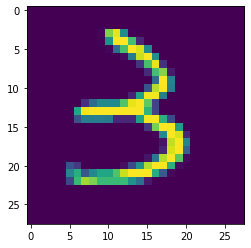

In [27]:
import matplotlib.pyplot as plt
plt.imshow(X[5].view(28,28))
plt.show()

In [28]:
print(torch.argmax(net(X[5].view(-1,784))[0]))

tensor(3)
